In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [3]:
data

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [5]:
data.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [6]:
data.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [9]:
data = data.drop(['neo_id','name','orbiting_body'],axis = 1)

In [10]:
data

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


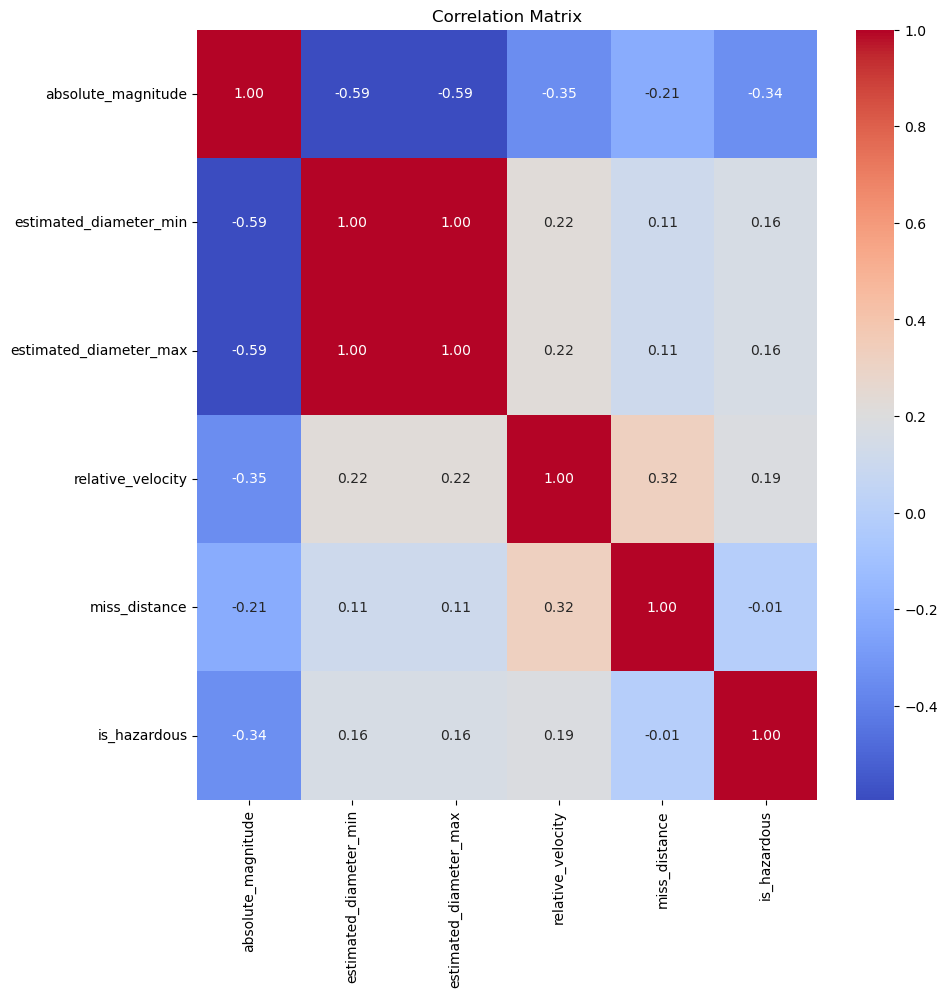

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
X = data.drop('is_hazardous', axis = 1)
X

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07
...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06


In [13]:
y = data['is_hazardous']
y

0         False
1          True
2         False
3         False
4         False
          ...  
338194    False
338195    False
338196    False
338197    False
338198    False
Name: is_hazardous, Length: 338171, dtype: bool

In [14]:
X.columns

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance'],
      dtype='object')

In [15]:
X.corr()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
absolute_magnitude,1.000000,-0.594646,-0.594646,-0.345570,-0.213523
estimated_diameter_min,-0.594646,1.000000,1.000000,0.222434,0.111475
estimated_diameter_max,-0.594646,1.000000,1.000000,0.222434,0.111475
relative_velocity,-0.345570,0.222434,0.222434,1.000000,0.322589
miss_distance,-0.213523,0.111475,0.111475,0.322589,1.000000


In [16]:
X

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07
...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06


In [17]:
encoder = LabelEncoder()


y = encoder.fit_transform(y)

In [18]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X

array([[-1.30273056,  0.75553115,  0.75553115,  0.78354069,  0.79946485],
       [-1.52257027,  1.18683296,  1.18683296,  2.23068176,  0.68670052],
       [-0.50924664, -0.06847576, -0.06847576, -0.9922207 ,  1.2357423 ],
       ...,
       [-0.34814535, -0.15283782, -0.15283782, -1.48591476,  0.5740475 ],
       [ 0.32786173, -0.36139181, -0.36139181,  0.19463588, -1.7498115 ],
       [ 0.00634617, -0.28520788, -0.28520788, -0.34089772, -1.65633252]])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [23]:
%%time 

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define the imputer
imputer = SimpleImputer(strategy='mean')  
# Create a pipeline that first imputes the data and then applies the RandomForestClassifier
model = Pipeline([
    ('imputer', imputer),
 ('classifier', RandomForestClassifier(n_estimators = 200 ,random_state = 42))
])

# Fit the model
model.fit(X_train, y_train)

CPU times: total: 6min 43s
Wall time: 7min 4s


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_preds = model.predict(X_test)
accuracy = accuracy_score(y_test,y_preds)
accuracy

0.9177940415465365

In [25]:
confusion_matrix(y_test, y_preds)


array([[57061,  2027],
       [ 3533,  5014]], dtype=int64)